In [0]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Definieer wat waardes voor je k's
k1 = 100000000       # kon for E + S to ES
k2 = 100                 # koff for ES to E + S
k3 = 100000000       # kon for E+I to non-covalent EI
k4 = 10                       # koff for EI to E+I
k5 = 0.01                  # kon for EI to covalent EI*
k6 = 0                       # koff for covalent EI* to non-covalent EI
kcat = 1                 # ES to E+P

# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)
E0 = 1*10**-12
ES0 = 0
P0 = 0
EI0 = 0
EIi0 = 0  #(EI*)

#Definieer constanten
I = 100*10**-9
S0 =100*10**-9
dt = 0.001 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 1 #save a frame every 60 s
tincub = 0#incubate for 1800 s
tsub =3600  # Run with substrate for 1800 s

In [0]:
concentraties = np.array([E0, ES0, P0, EI0, EIi0], dtype=np.double) #matrix van concentraties

In [0]:
# Voor toevoeging van S

S=0 # Geen S in je systeem

                        # [         E,       ES, P,     EI, EI*]
tijdevolutie0 = np.array([[-k3*I-k1*S,  k2+kcat, 0,     k4,   0],  #E
                          [      k1*S, -k2-kcat, 0,      0,   0],  #ES
                          [         0,     kcat, 0,      0,   0],  #P
                          [      k3*I,        0, 0, -k4-k5,  k6],  #EI
                          [         0,        0, 0,     k5, -k6]]) #EI*

#verandering in E   = [E]*(-k3*I-k1*S) + [ES]*(k2+kcat)  + [P]*(0) + [EI]*(k4)     + [EI*]*(0)
#verandering in ES  = [E]*(k1*S)       + [ES]*(-k2-kcat) + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in P   = [E]*(0)          + [ES]*(kcat)     + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in EI  = [E]*(k3*I)       + [ES]*(0)        + [P]*(0) + [EI]*(-k4-k5) + [EI*]*(k6)
#verandering in EI* = [E]*(0)          + [ES]*(0)        + [P]*(0) + [EI]*(k5)     + [EI*]*(-k6)


#Na toevoeging van S
S= S0
tijdevolutie1 = np.array([[-k3*I-k1*S, k2+kcat, 0, k4, 0],
                         [k1*S, -k2-kcat, 0, 0, 0],
                         [0, kcat, 0, 0, 0],
                         [k3*I, 0, 0, -k4-k5, k6],
                         [0, 0, 0, k5, -k6]])

In [0]:
# Maak een lijst van kopien van de concentraties
plot = [concentraties.copy()]

tijdconc = concentraties
t = 0
# Voor toevoging van S (tincub/dt stappen = 30min)
for i in range(int(tincub/dt)):
    t+= 1
    tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst
  
# Na toevoeging van S (tsub/dt stappen)
for i in range(int(tsub/dt)):
    t += 1
    tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst


In [0]:
# Splits de lijst van figuren in E, ES, P, EI en EI*
Eplot = [] 
ESplot = []
Pplot = []
EIplot = []
EIiplot = []
EItot = []
for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
    EIiplot.append(frame[4])
    EItot.append(frame[3]+frame[4]) 

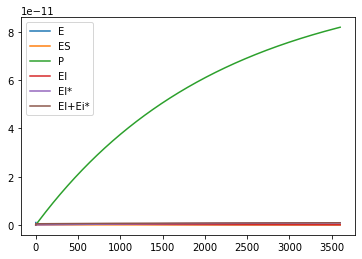

In [0]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()

(0, 1e-12)

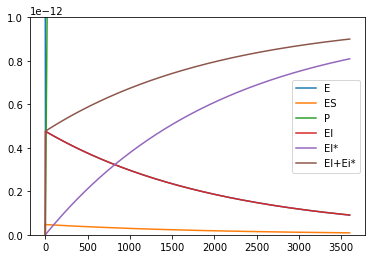

In [0]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()
plt.ylim(0,E0) #zoom in tot E0

In [0]:
print(Eplot)

[1e-12, 4.762117307317282e-13, 4.759849175758508e-13, 4.757582168282774e-13, 4.755316263215356e-13, 4.753051460020171e-13, 4.7507877581614e-13, 4.748525157103486e-13, 4.74626365631112e-13, 4.744003255249272e-13, 4.74174395338316e-13, 4.739485750178249e-13, 4.737228645100296e-13, 4.734972637615276e-13, 4.732717727189472e-13, 4.730463913289382e-13, 4.728211195381804e-13, 4.725959572933755e-13, 4.723709045412548e-13, 4.721459612285725e-13, 4.719211273021094e-13, 4.716964027086755e-13, 4.714717873951018e-13, 4.71247281308248e-13, 4.710228843949996e-13, 4.707985966022662e-13, 4.705744178769857e-13, 4.703503481661188e-13, 4.70126387416653e-13, 4.699025355756043e-13, 4.696787925900104e-13, 4.694551584069383e-13, 4.692316329734776e-13, 4.690082162367465e-13, 4.687849081438868e-13, 4.685617086420694e-13, 4.683386176784846e-13, 4.681156352003537e-13, 4.67892761154921e-13, 4.67669995489457e-13, 4.674473381512614e-13, 4.672247890876558e-13, 4.670023482459852e-13, 4.667800155736257e-13, 4.665577910

In [0]:
import pandas as pd

In [0]:
dataframe = pd.DataFrame(data={'E':Eplot,  "EI":EIplot, "EIi":EIiplot, "ES":ESplot, "P":Pplot})

In [0]:
# Verwijder hieronder het extra hekje om te exporteren naar csv, wat excel weer kan lezen
print(dataframe.to_csv())

,E,EI,EIi,ES,P
0,1e-12,0.0,0.0,0.0,0.0
1,4.762117307317282e-13,4.76186793420872e-13,4.515770920396317e-16,4.7149898755361585e-14,4.896317666683373e-14
2,4.759849175758508e-13,4.759599968747319e-13,9.276436985377287e-16,4.712744185088097e-14,9.610185717288974e-14
3,4.757582168282774e-13,4.757333082456842e-13,1.4034788018275853e-15,4.710499612421392e-14,1.4321808647349782e-13
4,4.755316263215356e-13,4.755067298515747e-13,1.8790825143600686e-15,4.708256131253324e-14,1.90311875499917e-13
5,4.753051460020171e-13,4.752802616387991e-13,2.3544549486566895e-15,4.7060137410531196e-14,2.373832351644821e-13
6,4.7507877581614e-13,4.750539035537771e-13,2.8295962171842363e-15,4.7037724412902584e-14,2.8443217637422243e-13
7,4.748525157103486e-13,4.748276555429564e-13,3.304506432354807e-15,4.7015322314344834e-14,3.314587100308613e-13
8,4.74626365631112e-13,4.746015175528087e-13,3.779185706525841e-15,4.6992931109557854e-14,3.7846284703082294e-13
9,4.744003255249272e-13,4.743754895298342e-13,4.2536341520

In [0]:
dataframe

,E,EI,EIi,ES,P
0,1.000000e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.762117e-13,4.761868e-13,4.515771e-16,4.714990e-14,4.896318e-14
2,4.759849e-13,4.759600e-13,9.276437e-16,4.712744e-14,9.610186e-14
3,4.757582e-13,4.757333e-13,1.403479e-15,4.710500e-14,1.432181e-13
4,4.755316e-13,4.755067e-13,1.879083e-15,4.708256e-14,1.903119e-13
...,...,...,...,...,...
3596,9.095798e-14,9.095364e-14,8.090826e-13,9.005779e-15,8.195623e-11
3597,9.091851e-14,9.091417e-14,8.091655e-13,9.001871e-15,8.196523e-11
3598,9.087906e-14,9.087472e-14,8.092483e-13,8.997965e-15,8.197423e-11
3599,9.083963e-14,9.083530e-14,8.093310e-13,8.994061e-15,8.198322e-11


In [0]:
dataframe.loc[20]

E      4.719211e-13
EI     4.718964e-13
EIi    9.457364e-15
ES     4.672508e-14
P      9.407695e-13
Name: 20, dtype: float64